In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',500)

Story

school : student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira )
sex : student's sex ('F' - female or 'M' - male)
age : student's age (from 15 to 22)
address : student's home address type ('U' - urban or 'R' - rural)
famsize : family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus : parent's cohabitation status ('T' - living together or 'A' - apart)
Medu : mother's education (0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary or 4 â€“ higher education)
Fedu : father's education (0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary or 4 â€“ higher education)
Mjob : mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob : father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason : reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
guardian : student's guardian ('mother', 'father' or 'other')
traveltime : home to school travel time (1 - < 5 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime : weekly study time (1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures : number of past class failures ( n if 1<=n < 3, else 4)
famsup : family educational support ( yes or no)
paid : extra paid classes within the course subject (Math or Portuguese) ( yes or no)
activities : extra-curricular activities (yes or no)
nursery : attended nursery school ( yes or no)
higher : wants to take higher education ( yes or no)
internet : Internet access at home ( yes or no)
romantic : with a romantic relationship ( yes or no)
famrel : quality of family relationships ( from 1 - very bad to 5 - excellent)
freetime : free time after school ( from 1 - very low to 5 - very high)
goout : going out with friends ( from 1 - very low to 5 - very high)
Dalc : workday alcohol consumption ( from 1 - very low to 5 - very high)
Walc : weekend alcohol consumption (from 1 - very low to 5 - very high)
health : current health status (from 1 - very bad to 5 - very good)
absences : number of school absences (from 0 to 93)
G1 : first period grade ( from 0 to 20)
G2 : second period grade ( from 0 to 20)
G3 : final grade ( from 0 to 20, output target)

In [2]:
df =pd.read_csv("student_data.csv")
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [21]:
# plot Father education  Against G3
dfg=df.groupby('Fedu').mean()
dfg=dfg.reset_index()
dfg['Fedu']=dfg['Fedu'].astype(float)
dfg.head()

,Fedu,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,15.500000,2.500000,2.000000,3.000000,0.000000,3.500000,3.500000,2.500000,1.000000,1.000000,2.000000,5.000000,12.000000,13.000000,13.000000
1,1.0,17.158537,1.731707,1.719512,1.951220,0.707317,3.963415,3.243902,3.109756,1.524390,2.378049,3.743902,5.048780,9.731707,9.390244,9.158537
2,2.0,16.643478,2.408696,1.400000,2.069565,0.347826,3.904348,3.278261,3.034783,1.521739,2.286957,3.478261,5.756522,11.026087,10.878261,10.260870
3,3.0,16.670000,3.130000,1.320000,2.120000,0.210000,4.030000,3.150000,3.120000,1.310000,2.260000,3.300000,6.440000,10.740000,10.750000,10.660000
4,4.0,16.416667,3.635417,1.395833,1.958333,0.135417,3.895833,3.260417,3.197917,1.583333,2.281250,3.781250,5.468750,11.927083,11.562500,11.364583


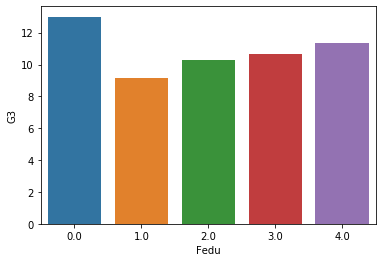

In [22]:
sb.barplot(y='G3',x ='Fedu',data=dfg)

In [24]:
# plot Mather and mother education  Against G3
dfg=df.groupby('Medu').mean()
dfg=dfg.reset_index()
dfg['Medu']=dfg['Medu'].astype(float)
dfg.head()


,Medu,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,17.333333,1.666667,1.333333,2.000000,1.000000,3.333333,3.333333,2.333333,1.666667,2.666667,4.000000,0.666667,12.000000,12.666667,13.000000
1,1.0,17.101695,1.457627,1.711864,1.813559,0.677966,3.881356,3.135593,3.067797,1.525424,2.525424,3.559322,3.932203,9.745763,9.169492,8.677966
2,2.0,16.708738,2.029126,1.504854,2.087379,0.320388,4.000000,3.233010,3.009709,1.349515,2.135922,3.660194,4.873786,10.563107,10.359223,9.728155
3,3.0,16.777778,2.595960,1.393939,2.090909,0.434343,4.030303,3.272727,3.171717,1.575758,2.414141,3.555556,7.737374,10.606061,10.444444,10.303030
4,4.0,16.427481,3.351145,1.328244,2.053435,0.099237,3.877863,3.251908,3.175573,1.488550,2.206107,3.458015,5.748092,11.908397,11.847328,11.763359


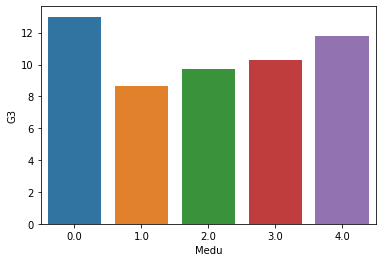

In [25]:
sb.barplot(y='G3',x ='Medu',data=dfg)

In [8]:

corr=df.corr()
#corr.sort_values(by=['G3'])
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


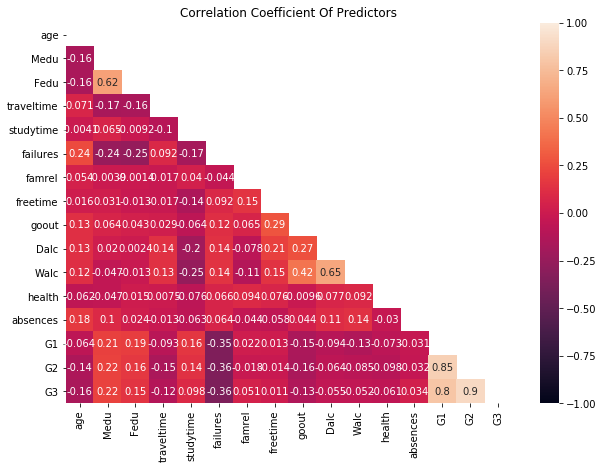

In [9]:
import seaborn as sns

# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

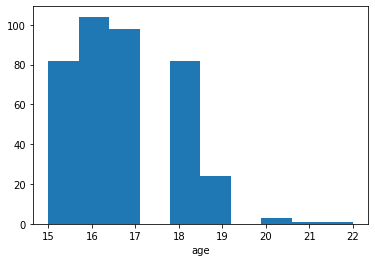

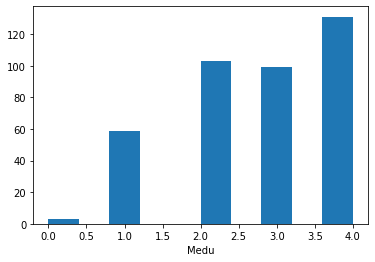

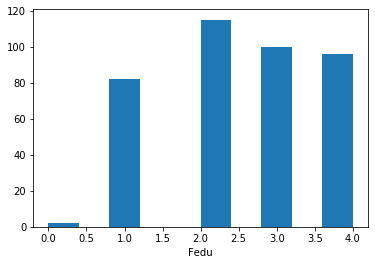

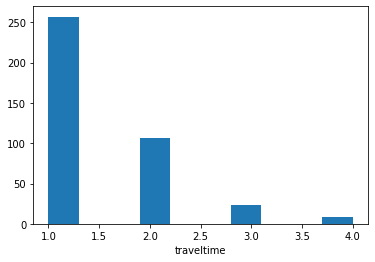

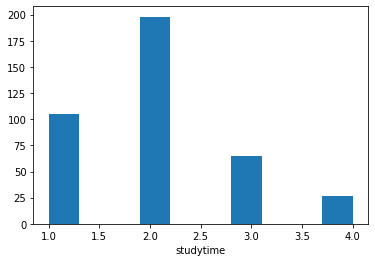

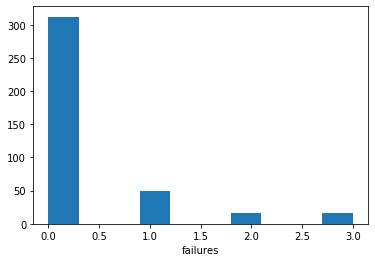

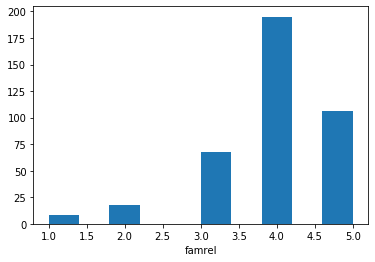

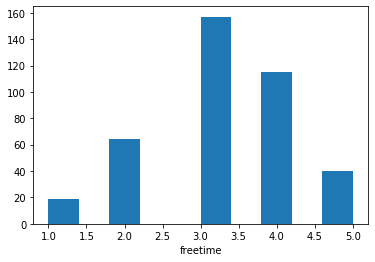

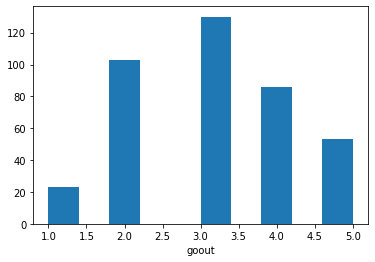

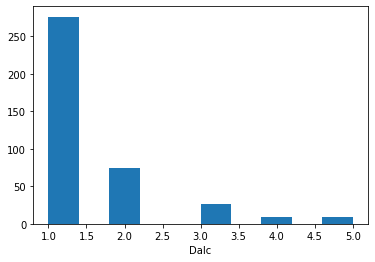

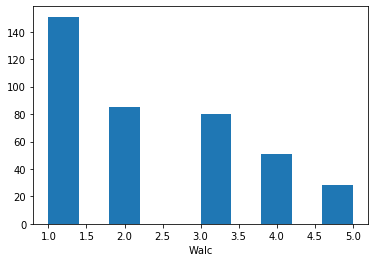

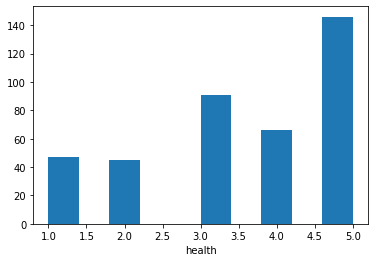

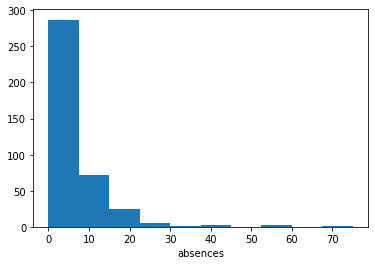

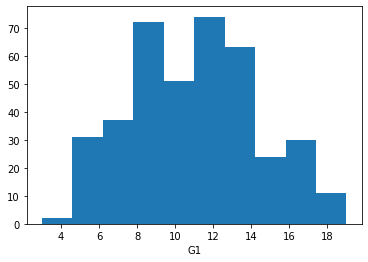

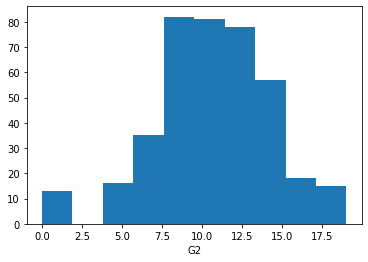

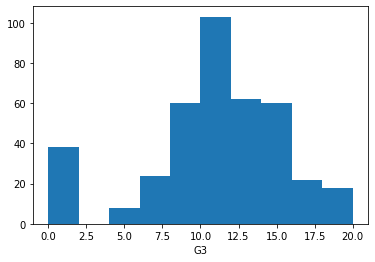

In [7]:
df_numeric= df.select_dtypes(include=[np.number])
for var in df_numeric:
    plt.hist(df[var])
    plt.xlabel(var)
    plt.show()

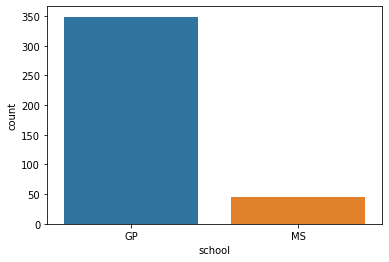

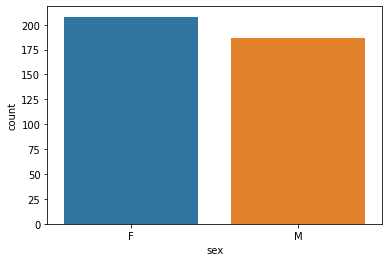

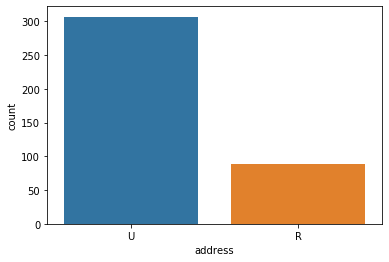

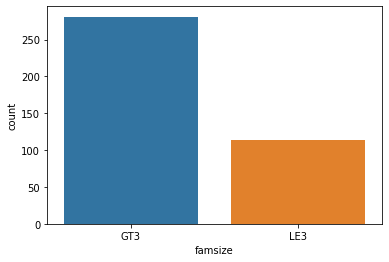

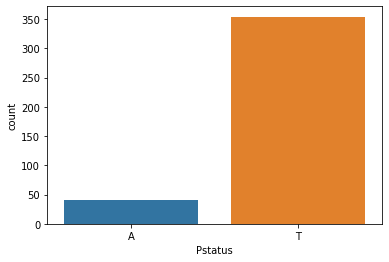

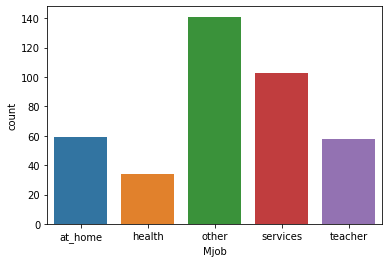

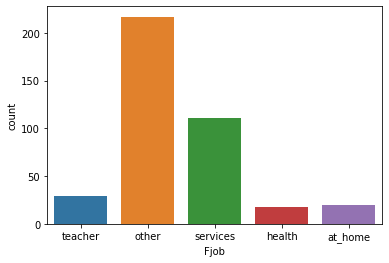

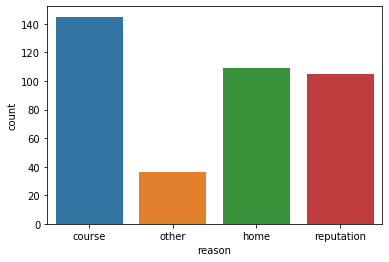

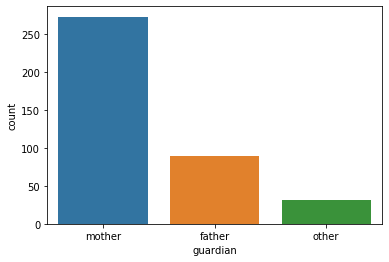

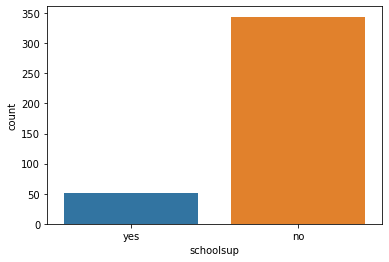

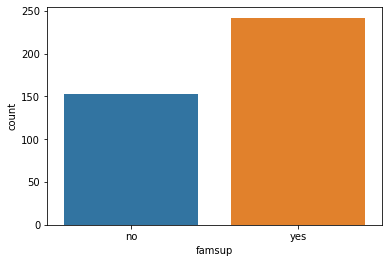

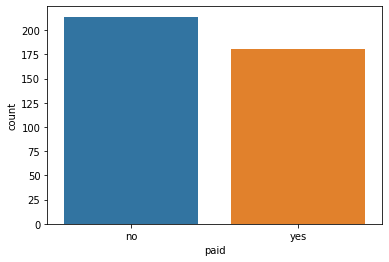

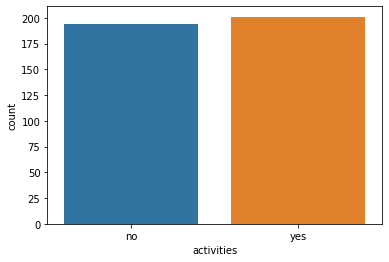

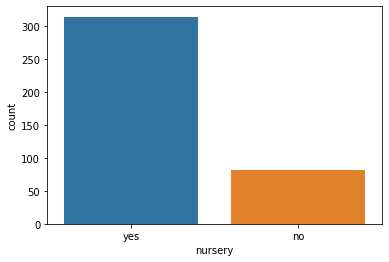

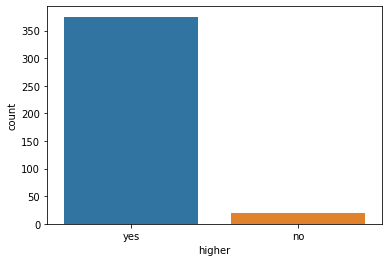

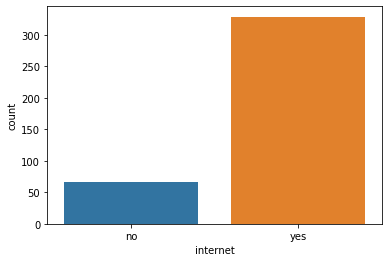

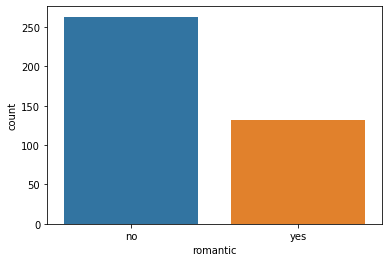

In [10]:
df_non_numeric= df.select_dtypes(exclude=[np.number])
for var in df_non_numeric:
    sb.countplot(x=var,data=df)
    plt.xlabel(var)
    plt.show()

In [24]:
y=X['G3']
X=X.drop(columns=['G1','G2','G3'])
X=pd.get_dummies(X,drop_first=True)
X.head()

,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
Medu,,,,,,,,,,,,
0,17.333333,1.666667,1.333333,2.000000,1.000000,3.333333,3.333333,2.333333,1.666667,2.666667,4.000000,0.666667
1,17.101695,1.457627,1.711864,1.813559,0.677966,3.881356,3.135593,3.067797,1.525424,2.525424,3.559322,3.932203
2,16.708738,2.029126,1.504854,2.087379,0.320388,4.000000,3.233010,3.009709,1.349515,2.135922,3.660194,4.873786
3,16.777778,2.595960,1.393939,2.090909,0.434343,4.030303,3.272727,3.171717,1.575758,2.414141,3.555556,7.737374
4,16.427481,3.351145,1.328244,2.053435,0.099237,3.877863,3.251908,3.175573,1.488550,2.206107,3.458015,5.748092


In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
selk = SelectKBest(f_regression, k=10)
selk.fit(X, y)
filter = selk.get_support()
print(filter)
f=X.columns
print(f[filter])
X_k=X
for cols in  X.columns:
    if cols not in f[filter]:
        X_k.drop(columns=[cols],inplace=True)
        

[ True  True  True  True False  True False False  True False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
  True False  True]
Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'goout', 'address_U',
       'Mjob_health', 'higher_yes', 'romantic_yes'],
      dtype='object')


In [13]:
X_k.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'goout', 'address_U',
       'Mjob_health', 'higher_yes', 'romantic_yes'],
      dtype='object')

In [28]:
# Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=0)

In [29]:
# scale data
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
# We will do the model fitting and feature selection
# altogether in a few lines of code

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which
# will select automatically the features which coefficients are non-zero

# remember to set the seed, the random state in this function
'''from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
estimator= Lasso(alpha=0.005, random_state=0)
sel_ = SelectFromModel(estimator)

# train Lasso model and select features
sel_.fit(X_train, y_train)
print( sel_.estimator_.score(X_test,y_test))
sel_.get_support()'''

'from sklearn.linear_model import Lasso\nfrom sklearn.feature_selection import SelectFromModel\nestimator= Lasso(alpha=0.005, random_state=0)\nsel_ = SelectFromModel(estimator)\n\n# train Lasso model and select features\nsel_.fit(X_train, y_train)\nprint( sel_.estimator_.score(X_test,y_test))\nsel_.get_support()'

In [30]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print( lin_reg.score(X_test,y_test))
y_pred = lin_reg.predict(X_test)
y_test

-9.673892641932401


Medu
2     9.728155
0    13.000000
Name: G3, dtype: float64

In [ ]:
y_pred

In [21]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
print(lin_reg_2.score(poly_reg.fit_transform(X_test),y_test))

-4.755630736470563e+20


In [24]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [25]:
print( regressor.score(X_test,y_test))

-0.6869547920223946


In [26]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [27]:
print( regressor.score(X_test,y_test))

0.03553485082140062


In [48]:
# Fitting XGBoost to the Training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

# scale data
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from xgboost import XGBRegressor
Regressor= XGBRegressor()

# create an xgboost regression model
model = XGBRegressor(n_estimators= 200,
    max_depth= 7,
    min_samples_split= 5,
    learning_rate= 0.01,
   objective='reg:squarederror')
Regressor.fit(X_train, y_train)

[17:53:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
print(Regressor.score(X_test,y_test))

0.09930198730154716


In [50]:
# Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
print( regressor.score(X_test,y_test))

0.06524648401225697


In [61]:
# Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(classifier.score(X_test,y_test))

0.08860759493670886
